In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=cl,edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],X_test[:, 1],c='',edgecolor='black',
                    alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

In [2]:
import pandas as pd
df = pd.read_csv("stars_simple.csv")

In [3]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,4
236,30839,834042.000000,1194.0000,-10.63,Blue,O,4
237,8829,537493.000000,1423.0000,-10.73,White,A,4
238,9235,404940.000000,1112.0000,-11.23,White,A,4


In [4]:
xt = df["Temperature"]
xl = df["L"]
xr = df["R"]
xm = df["A_M"]
y = df["Type"]

In [5]:
import matplotlib.pyplot as plt

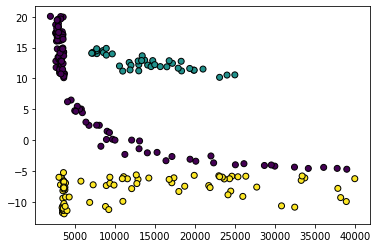

In [6]:
plt.scatter(xt,xm,c=y,edgecolor='black')

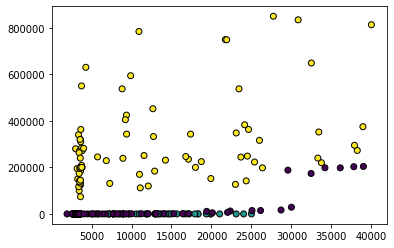

In [7]:
plt.scatter(xt,xl,c=y,edgecolor='black')

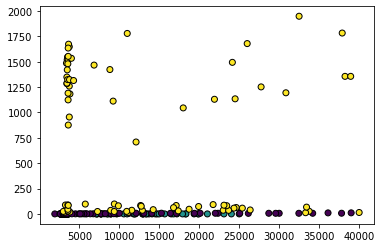

In [8]:
plt.scatter(xt,xr,c=y,edgecolor='black')

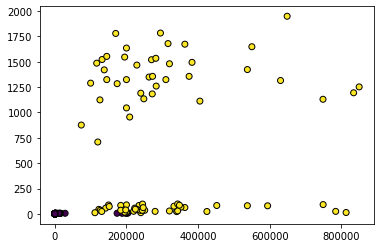

In [9]:
plt.scatter(xl,xr,c=y,edgecolor='black')

In [12]:
import numpy as np
xl_log = np.log10(xl)
xr_log = np.log10(xr)

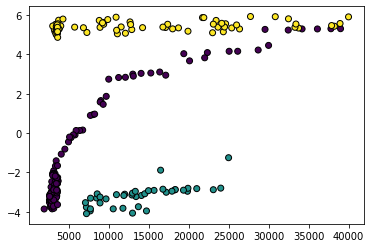

In [9]:
plt.scatter(xt,xl_log,c=y,edgecolor='black')

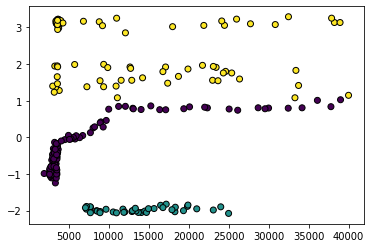

In [10]:
plt.scatter(xt,xr_log,c=y,edgecolor='black')

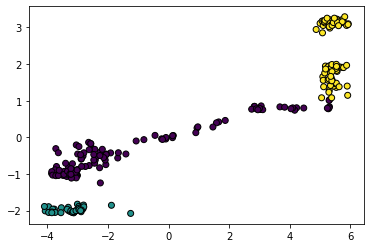

In [11]:
plt.scatter(xl_log,xr_log,c=y,edgecolor='black')

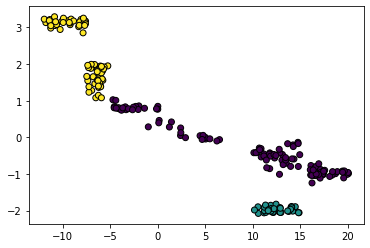

In [12]:
plt.scatter(xm,xr_log,c=y,edgecolor='black')

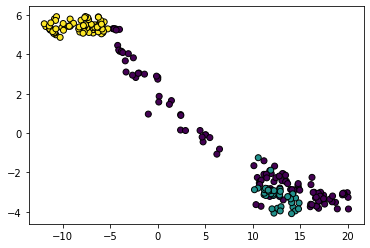

In [13]:
plt.scatter(xm,xl_log,c=y,edgecolor='black')

In [13]:
df["L(log)"]=xl_log
df["R(log)"]=xr_log

In [14]:
X1 = df[["Temperature","A_M"]]
X2 = df[["Temperature","L(log)"]]

In [15]:
X1

,Temperature,A_M
0,3068,16.12
1,3042,16.60
2,2600,18.70
3,2800,16.65
4,1939,20.06
...,...,...
235,38940,-9.93
236,30839,-10.63
237,8829,-10.73
238,9235,-11.23


In [16]:
X2

,Temperature,L(log)
0,3068,-2.619789
1,3042,-3.301030
2,2600,-3.522879
3,2800,-3.698970
4,1939,-3.860121
...,...,...
235,38940,5.573834
236,30839,5.921188
237,8829,5.730373
238,9235,5.607391


In [50]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y, test_size=0.3, random_state=1, stratify=y)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X1_train)
X1_train_std = sc.transform(X1_train)
X1_test_std = sc.transform(X1_test)

In [54]:
from sklearn.linear_model import Perceptron
ppn1 = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn1.fit(X1_train_std, y1_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y1_pred_ppn = ppn1.predict(X1_test_std)
print('Misclassified samples: %d' % (y1_test != y1_pred_ppn).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y1_test, y1_pred_ppn))

Misclassified samples: 10
Accuracy: 0.86


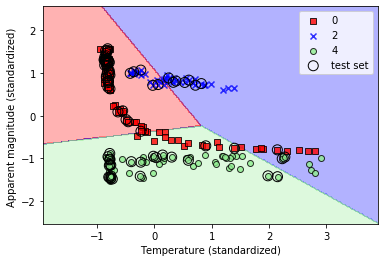

In [56]:
X1_combined = np.vstack((X1_train_std, X1_test_std))
y1_combined = np.hstack((y1_train, y1_test))
plot_decision_regions(
    X=X1_combined, y=y1_combined,classifier=ppn, test_idx=range(168, 240))
plt.xlabel('Temperature (standardized)')
plt.ylabel('Apparent magnitude (standardized) ')
plt.legend(loc='upper right')
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr1.fit(X1_train_std, y1_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [58]:
y1_pred_lr = lr1.predict(X1_test_std)
print('Misclassified samples: %d' % (y1_test != y1_pred_lr).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y1_test, y1_pred_lr))

Misclassified samples: 5
Accuracy: 0.93


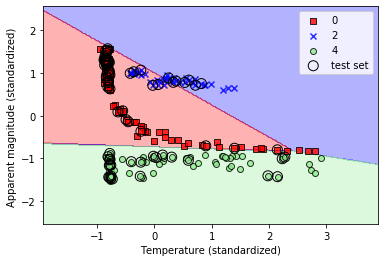

In [60]:
X1_combined = np.vstack((X1_train_std, X1_test_std))
y1_combined = np.hstack((y1_train, y1_test))
plot_decision_regions(
    X=X1_combined, y=y1_combined,classifier=lr1, test_idx=range(168, 240))
plt.xlabel('Temperature (standardized)')
plt.ylabel('Apparent magnitude (standardized) ')
plt.legend(loc='upper right')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.3, random_state=1, stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X2_train)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)

In [19]:
from sklearn.linear_model import Perceptron
ppn2 = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn2.fit(X2_train_std, y2_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
y2_pred_ppn = ppn2.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y2_pred_ppn).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y2_test, y2_pred_ppn))

Misclassified samples: 3
Accuracy: 0.96


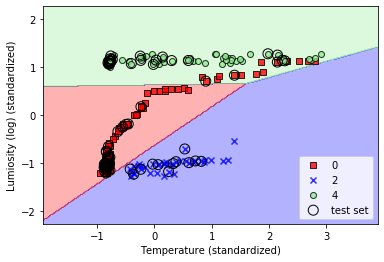

In [27]:
X2_combined = np.vstack((X2_train_std, X2_test_std))
y2_combined = np.hstack((y2_train, y2_test))
plot_decision_regions(
    X=X2_combined, y=y2_combined,classifier=ppn2, test_idx=range(168, 240))
plt.xlabel('Temperature (standardized)')
plt.ylabel('Lumiosity (log) (standardized)')
plt.legend(loc='lower right')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr2.fit(X2_train_std, y2_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y2_pred_lr = lr2.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y2_pred_lr).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y2_test, y2_pred_lr))

Misclassified samples: 1
Accuracy: 0.99


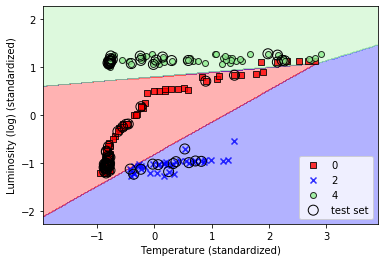

In [26]:
X2_combined = np.vstack((X2_train_std, X2_test_std))
y2_combined = np.hstack((y2_train, y2_test))
plot_decision_regions(
    X=X2_combined, y=y2_combined,classifier=lr2, test_idx=range(168, 240))
plt.xlabel('Temperature (standardized)')
plt.ylabel('Luminosity (log) (standardized)')
plt.legend(loc='lower right')
plt.show()